Nabilla Putri Cahayani_202131012

In [117]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [118]:
image = cv2.imread('uas_buah1.jpg')

## Konversi Gambar ke HSV

In [119]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

## Menentukan Batas Atas & Bawah HSV

In [120]:
red_low = np.array([136, 87, 111], np.uint8)
red_high = np.array([180, 255, 255], np.uint8)

green_low = np.array([25, 52, 72], np.uint8)
green_high = np.array([102, 255, 255], np.uint8)

orange_low = np.array([10, 100, 20], np.uint8)
orange_high = np.array([25, 255, 255], np.uint8)

## Membuat Mask untuk Setiap Warna

In [121]:
red_mask = cv2.inRange(hsv_image, red_low, red_high)

green_mask = cv2.inRange(hsv_image, green_low, green_high)

orange_mask = cv2.inRange(hsv_image, orange_low, orange_high)

## Proses Dilasi

In [122]:
kernel = np.ones((70,80), np.uint8)
dilated_red_mask = cv2.dilate(red_mask, kernel, iterations=1)

kernel = np.ones((5,5), np.uint8)
dilated_green_mask = cv2.dilate(green_mask, kernel, iterations=1)

kernel = np.ones((5,5), np.uint8)
dilated_orange_mask = cv2.dilate(orange_mask, kernel, iterations=1)

## Bitwise_and Antara Citra & Mask

In [160]:
apel_red = cv2.bitwise_and(image, image, mask=dilated_red_mask)

In [161]:
mangga_green = cv2.bitwise_and(image, image, mask=dilated_green_mask)

In [162]:
jeruk_orange = cv2.bitwise_and(image, image, mask=dilated_orange_mask)

## Menampilkan Gambar Asli & Output Identifikasi Antar Warna

Text(0.5, 1.0, 'Jeruk')

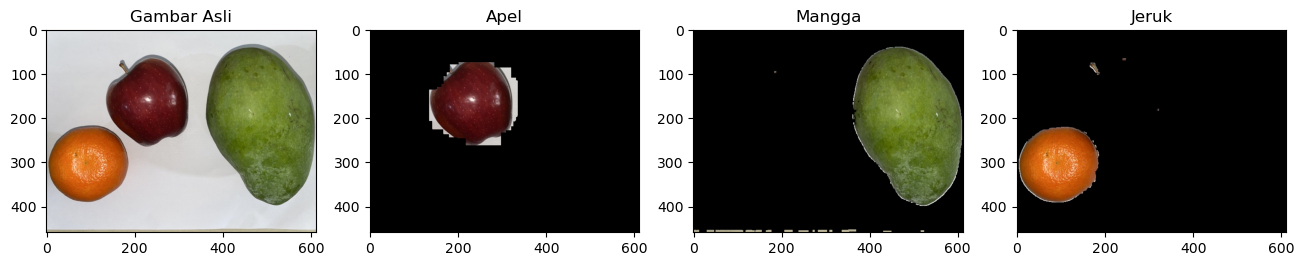

In [171]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
apel_red = cv2.cvtColor(apel_red, cv2.COLOR_RGB2BGR)
mangga_green = cv2.cvtColor(mangga_green, cv2.COLOR_RGB2BGR)
jeruk_orange = cv2.cvtColor(jeruk_orange, cv2.COLOR_RGB2BGR)

fig, axes = plt.subplots(1,4, figsize=(16,8))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Gambar Asli")

ax[1].imshow(apel_red)
ax[1].set_title("Apel")

ax[2].imshow(mangga_green)
ax[2].set_title("Mangga")

ax[3].imshow(jeruk_orange)
ax[3].set_title("Jeruk")